# DIMENSIONALITY REDUCTION & DATA PROJECTION WITH SAGEMAKER

## DATA PREPROCESSING

#### 1 - SET DATA DIRECTORY

In [1]:
DATA_DIR = "./data/"
dataset = DATA_DIR + "abalone.csv"

#### 2 - IMPORT LIBRARIES

In [2]:
# Import scientific's libraries
import io
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install -U pandas-profiling
from pandas_profiling import ProfileReport

# Import Machine Learning's libraries
import sklearn as sk
from sklearn import manifold
from sklearn import datasets
from sklearn import decomposition
from sklearn import ensemble
from sklearn import discriminant_analysis
from sklearn import random_projection
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Print ML's libraries version
print("\nSKLEARN VERSION\n", sk.__version__)
print("\nNUMPY VERSION\n", np.__version__)
print("\nPANDAS VERSION\n", pd.__version__)

Requirement already up-to-date: pandas-profiling in d:\iabd\softwares\anaconda3_2019-10\envs\tf2gpu\lib\site-packages (2.8.0)



SKLEARN VERSION
 0.22.1

NUMPY VERSION
 1.17.4

PANDAS VERSION
 1.0.5


#### 3 - ANALYZE DATASET

In [38]:
df = pd.read_csv(dataset, names=["Sex", 
                               "Length", 
                               "Diameter", 
                               "Height", 
                               "Whole weight", 
                               "Shucked weight", 
                               "Viscera weight", 
                               "Shell weight", 
                               "Rings"])

In [39]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


We will now get an **entire profiling** and **pairplot** of our dataset *(Missing celles, duplicate raws, features' distribution, correlations).

In [5]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()

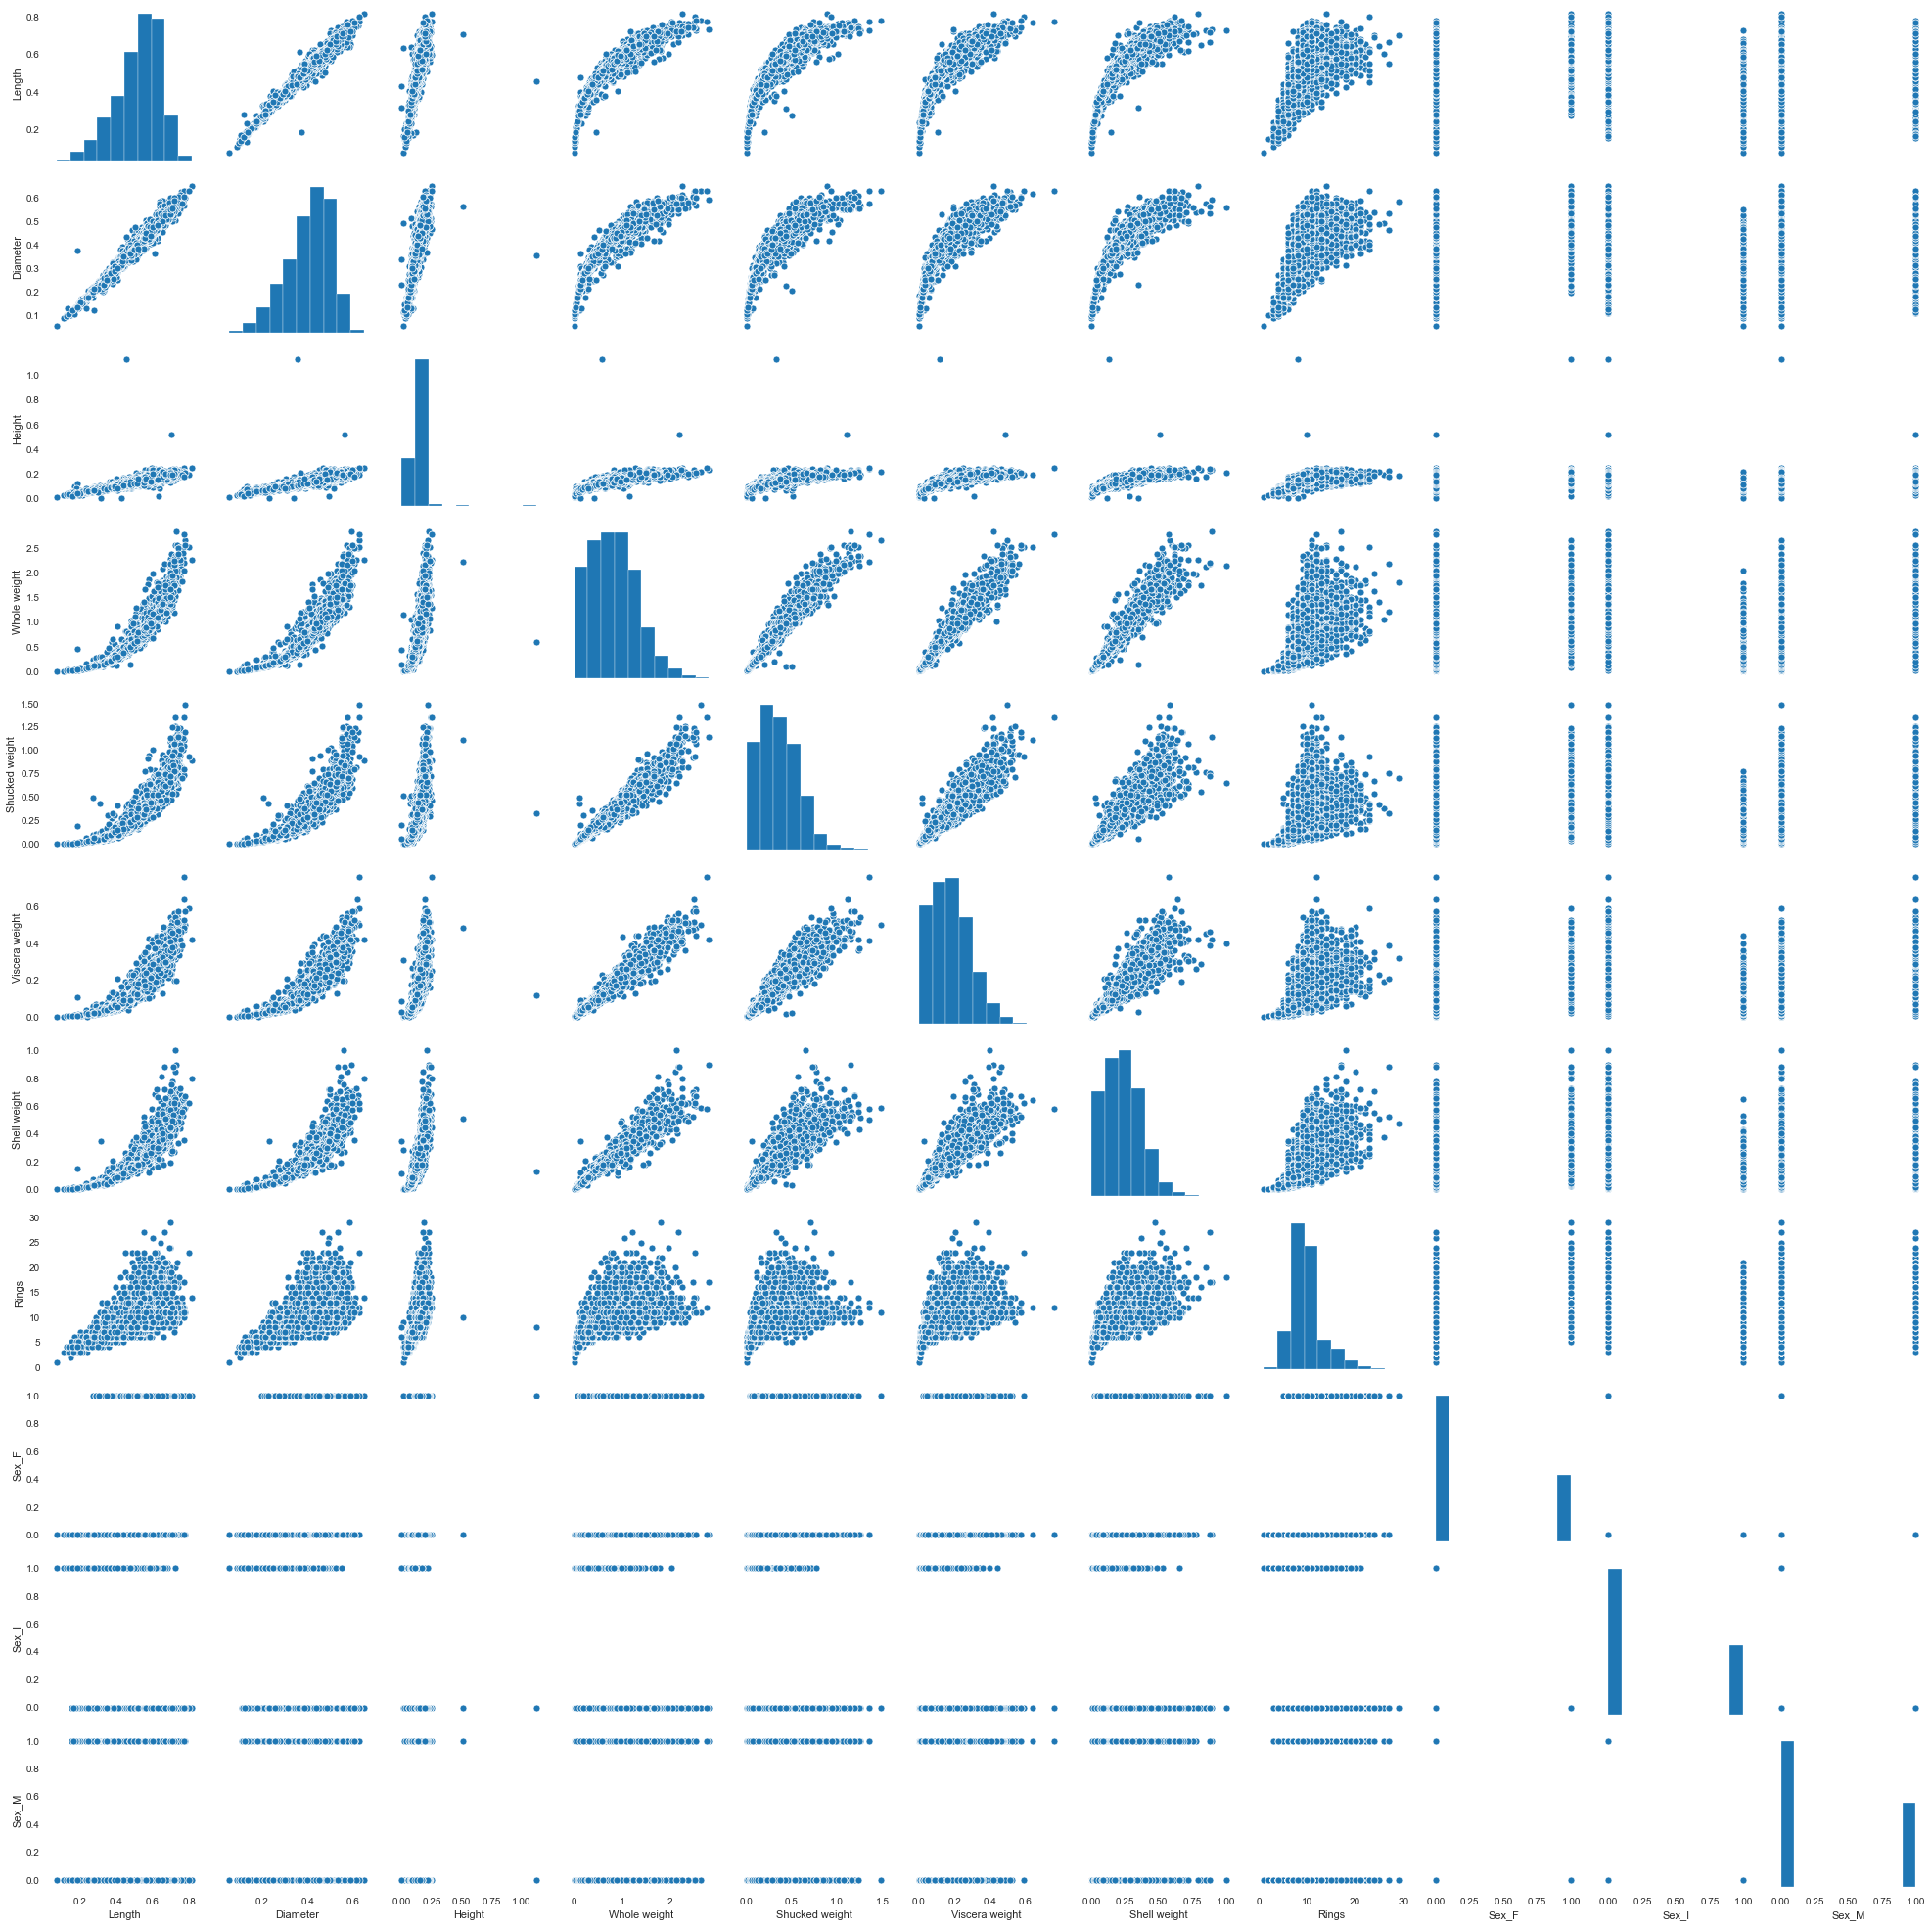

In [43]:
sns.pairplot(df)

#### 4 - REMOVE HIGH CORRELATION

In [44]:
df = df.drop(['Length', 'Whole weight', 'Viscera weight', 'Shell weight'], axis=1)

We'll drop **Length, Whole weight, Viscera weight** and **Shell weight** because there are too much **high correlation** between these features in our dataset.

In [45]:
df

,Diameter,Height,Shucked weight,Rings,Sex_F,Sex_I,Sex_M
0,0.365,0.095,0.2245,15,0,0,1
1,0.265,0.090,0.0995,7,0,0,1
2,0.420,0.135,0.2565,9,1,0,0
3,0.365,0.125,0.2155,10,0,0,1
4,0.255,0.080,0.0895,7,0,1,0
...,...,...,...,...,...,...,...
4172,0.450,0.165,0.3700,11,1,0,0
4173,0.440,0.135,0.4390,10,0,0,1
4174,0.475,0.205,0.5255,9,0,0,1
4175,0.485,0.150,0.5310,10,1,0,0


#### 5 - LABEL & ONE HOT ENCODE (categorical variable: Sex)

In [41]:
df = pd.get_dummies(df)

We **get dummies** with pandas library to transform categorical variable "Sex" in One Hot Encoding style to get only **continue numerous data.**

In [10]:
df

,Diameter,Height,Shucked weight,Rings,Sex_F,Sex_I,Sex_M
0,0.365,0.095,0.2245,15,0,0,1
1,0.265,0.090,0.0995,7,0,0,1
2,0.420,0.135,0.2565,9,1,0,0
3,0.365,0.125,0.2155,10,0,0,1
4,0.255,0.080,0.0895,7,0,1,0
...,...,...,...,...,...,...,...
4172,0.450,0.165,0.3700,11,1,0,0
4173,0.440,0.135,0.4390,10,0,0,1
4174,0.475,0.205,0.5255,9,0,0,1
4175,0.485,0.150,0.5310,10,1,0,0


In [11]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()

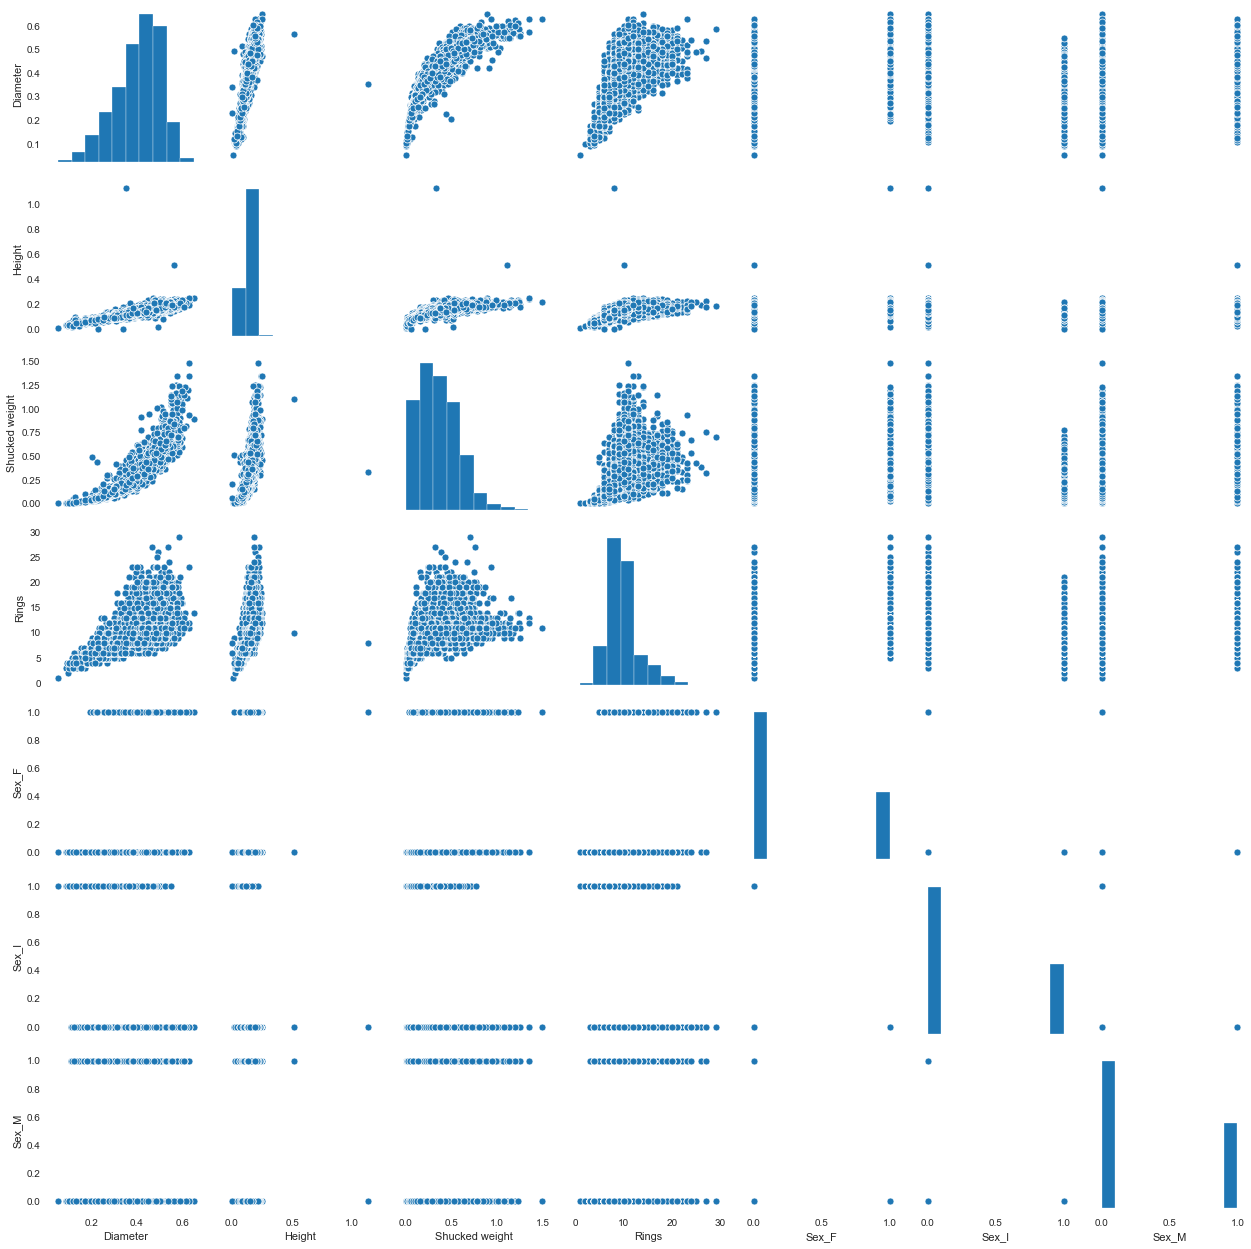

In [47]:
sns.pairplot(df)

#### 6 - SPLIT DATASET IN MATRIX (X) & VECTOR (y)

In [48]:
X = df.drop(['Rings'], axis=1)
y = df['Rings']

#### Abalone's matrix

In [49]:
X

,Diameter,Height,Shucked weight,Sex_F,Sex_I,Sex_M
0,0.365,0.095,0.2245,0,0,1
1,0.265,0.090,0.0995,0,0,1
2,0.420,0.135,0.2565,1,0,0
3,0.365,0.125,0.2155,0,0,1
4,0.255,0.080,0.0895,0,1,0
...,...,...,...,...,...,...
4172,0.450,0.165,0.3700,1,0,0
4173,0.440,0.135,0.4390,0,0,1
4174,0.475,0.205,0.5255,0,0,1
4175,0.485,0.150,0.5310,1,0,0


#### Abalone's vector (name: Rings)

In [17]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

## MACHINE LEARNING

### 1 - Principle Component Analysis (PCA)

--- Learning time : 0.4280664920806885 seconds ---

Wall time: 435 ms


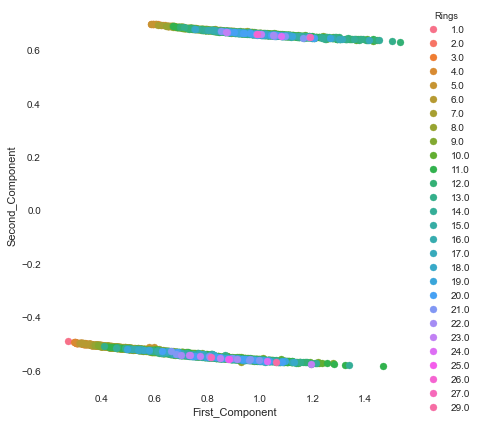

In [18]:
%%time
X_pca = decomposition.TruncatedSVD(n_components = 2).fit_transform(X)

# Attach the label for each 2-d data point
X_pca = np.vstack((X_pca.T, y)).T

# Start time for processing
start_time = time.time()

dataset_pca = pd.DataFrame(X_pca, columns = ['First_Component',
                                             'Second_Component',
                                             'Rings'])
sns.FacetGrid(data = dataset_pca, hue = 'Rings', height = 6)\
   .map(plt.scatter, 'First_Component', 'Second_Component')\
   .add_legend()

print("--- Learning time : %s seconds ---\n" % (time.time() - start_time))

We can observe thaht first component represent **Height.** The second compenent represent two differents sex: **male** *(top)* and **female** *(bottom)*. However, we can think that children are "missing", but they are **probably overlapse** in female and male area Projections is approximately the same between them, we can see that he **center of projection** is blue and pink and **the extremites** are red yellow and green.

### 2 - t-Student distribution Stochastic Neighborhoud Embedding (t-SNE)

--- Learning time: 0.419201135635376 seconds ---

Wall time: 16.1 s


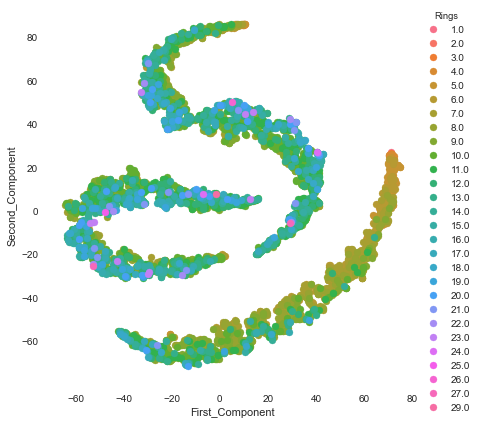

In [31]:
%%time
X_transformed = manifold.TSNE(n_components = 2).fit_transform(X)

X_transformed = np.vstack((X_transformed.T, y)).T

start_time = time.time()

dataset_tsne = pd.DataFrame(X_transformed, columns = ['First_Component',
                                                      'Second_Component',
                                                      'Rings'])

sns.FacetGrid(data = dataset_tsne, hue = 'Rings', height = 6)\
   .map(plt.scatter, 'First_Component', 'Second_Component')\
   .add_legend()

print("--- Learning time: %s seconds ---\n" % (time.time() - start_time))

**WIP**

We can observe the three differents sex... BUT WHAT THE FUCK IS THAT?! **GOA'ULD??**

**Better result** with normalization below!

### 3 - Spectral Embedding

D:\IABD\Softwares\Anaconda3_2019-10\envs\tf2gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


--- Learning time: 0.3761179447174072 seconds ---

Wall time: 2.53 s


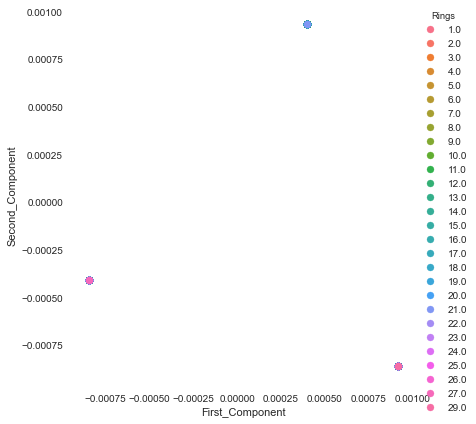

In [32]:
%%time
X_transformed = manifold.SpectralEmbedding(n_components = 2, eigen_solver = 'arpack').fit_transform(X)

X_transformed = np.vstack((X_transformed.T, y)).T

start_time = time.time()

dataset_spectal_embedding = pd.DataFrame(X_transformed, columns = ['First_Component',
                                                                   'Second_Component',
                                                                   'Rings'])

sns.FacetGrid(data = dataset_spectal_embedding, hue = 'Rings', height = 6)\
   .map(plt.scatter, 'First_Component', 'Second_Component')\
   .add_legend()

print("--- Learning time: %s seconds ---\n" % (time.time() - start_time))

We can observe three differents plots, that whom represent the 3 differents sex in second component *(but there are completely overlapsed).* However we **can't really get more information,** about this dimensional reduction model.

## > NORMALIZATION

We will normalize *(by standard scaler)* data to get new projections and **try to get better results.**

In [33]:
X_std = StandardScaler().fit_transform(X)

#### 1- PCA

--- Learning time: 0.4130821228027344 seconds ---

Wall time: 416 ms


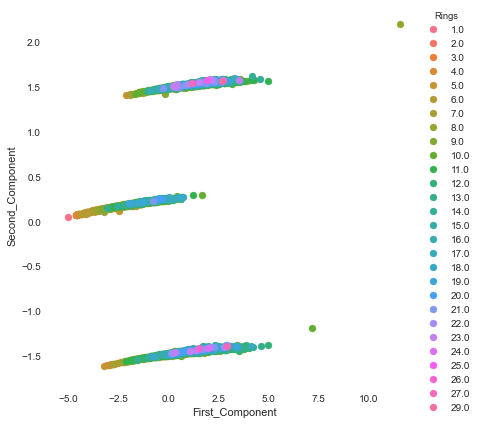

In [34]:
%%time
X_pca = decomposition.TruncatedSVD(n_components = 2).fit_transform(X_std)

# Attach the label for each 2-d data point
X_pca = np.vstack((X_pca.T, y)).T

start_time = time.time()

dataset_pca = pd.DataFrame(X_pca, columns = ['First_Component',
                                            'Second_Component',
                                            'Rings'])
sns.FacetGrid(data = dataset_pca, hue = 'Rings', height = 6)\
   .map(plt.scatter, 'First_Component', 'Second_Component')\
   .add_legend()

print("--- Learning time: %s seconds ---\n" % (time.time() - start_time))

From our previous projection, we can observe that a **third area plots** appears.

That seams to **represent children**, because they have a **Height smaller** than the two others *(male and female).*

#### 2 - T-SNE

--- Learning time: 0.40520596504211426 seconds ---

Wall time: 15.3 s


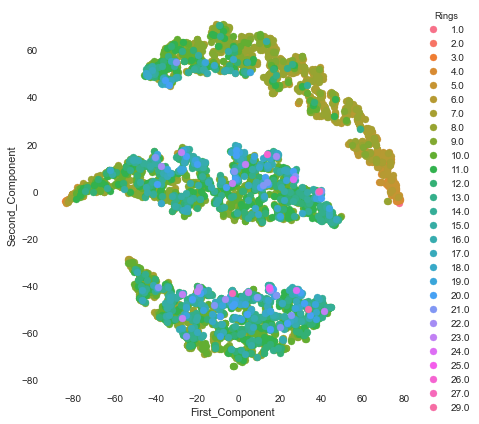

In [35]:
%%time
X_transformed = manifold.TSNE(n_components = 2).fit_transform(X_std)

X_transformed = np.vstack((X_transformed.T, y)).T

start_time = time.time()

dataset_tsne = pd.DataFrame(X_transformed, columns = ['First_Component',
                                                     'Second_Component',
                                                     'Rings'])

sns.FacetGrid(data = dataset_tsne, hue = 'Rings', height = 6)\
   .map(plt.scatter, 'First_Component', 'Second_Component')\
   .add_legend()

print("--- Learning time: %s seconds ---\n" % (time.time() - start_time))

**WIP**

With Standard Scaler normalization, we can more easily observed our three differents sex: male, children, female. 

Furthermore, we can observe more **hypothetics young abalones** in the top of the graphic *(red, yellow and green are majority).*

**but what was the first component ???**

### 3 - Spectral Embedding

--- Learning time: 0.7627232074737549 seconds ---

Wall time: 3.72 s


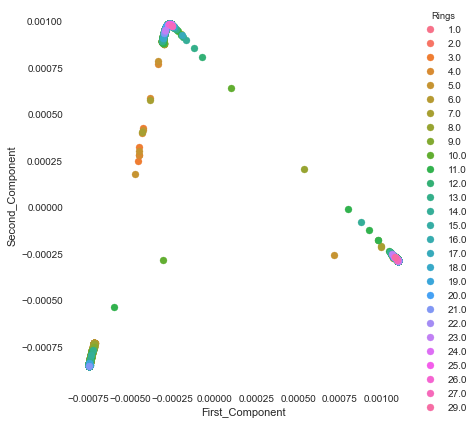

In [36]:
%%time
X_transformed = manifold.SpectralEmbedding(n_components = 2, eigen_solver = 'arpack').fit_transform(X_std)

X_transformed = np.vstack((X_transformed.T, y)).T

start_time = time.time()

dataset_spectal_embedding = pd.DataFrame(X_transformed, columns = ['First_Component',
                                                      'Second_Component',
                                                      'Rings'])

sns.FacetGrid(data = dataset_spectal_embedding, hue = 'Rings', height = 6)\
   .map(plt.scatter, 'First_Component', 'Second_Component')\
   .add_legend()

print("--- Learning time: %s seconds ---\n" % (time.time() - start_time))

**WIP**

WOW